In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

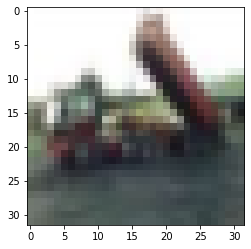

In [ ]:
plt.imshow(x_train[2])

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

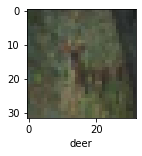

In [ ]:
plot_sample(x_train,y_train,10)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=('accuracy'))

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 160s 102ms/step - loss: 1.8084 - accuracy: 0.3580
Epoch 2/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6190 - accuracy: 0.4315
Epoch 3/5
1563/1563 [==============================] - 160s 103ms/step - loss: 1.5357 - accuracy: 0.4599
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4765 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 160s 102ms/step - loss: 1.4286 - accuracy: 0.4982


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = ann.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

In [ ]:
print('classification report: \n',classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.71      0.51      0.59      1000
           2       0.35      0.33      0.34      1000
           3       0.46      0.10      0.17      1000
           4       0.32      0.60      0.42      1000
           5       0.42      0.33      0.37      1000
           6       0.58      0.40      0.47      1000
           7       0.46      0.59      0.52      1000
           8       0.49      0.72      0.58      1000
           9       0.59      0.50      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4868 - accuracy: 0.4616
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1382 - accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0049 - accuracy: 0.6495
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9251 - accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8559 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8064 - accuracy: 0.7187
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7583 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7111 - accuracy: 0.7519
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6800 - accuracy: 0.7636
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9162 - accuracy: 0.6989


[0.9162302613258362, 0.6988999843597412]

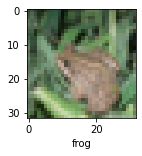

In [ ]:
plot_sample(x_test,y_test,4)

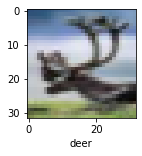

In [ ]:
plot_sample(x_test,y_test,40)

In [ ]:
#(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()